# **😀 Facial Emotion Recognition: CNNs and Transfer Learning for Grayscale vs RGB**

## **I. Overview**

### **i. Context**

Facial expressions are one of the most universal and powerful forms of non-verbal communication. With the rapid growth of human–computer interaction, telemedicine, security systems, driver monitoring, education technology, and customer experience analytics, the ability for machines to accurately recognize human emotions has become increasingly critical.
Traditional systems rely on manual interpretation or surveys, which are slow, subjective, and difficult to scale. Automated facial emotion detection enables real-time understanding of user states (e.g., stress, confusion, happiness), which can dramatically improve personalization, safety, and overall user experience.

In short, enabling computers to interpret human emotions bridges the gap between human behavior and machine intelligence.

### **ii. Objectives**

The primary objective of the facial emotion detection project is to build a machine learning model capable of accurately classifying human facial expressions into predefined emotional categories (e.g., happy, sad, angry, surprised, neutral, etc.).

Specific goals include:

- Develop a robust image classification model that can generalize across diverse faces (age, gender, ethnicity, lighting).
- Detect emotions in real time, supporting potential real-world applications.
- Evaluate model performance through precision, recall, F1-score, and confusion matrices.
- Deploy or integrate the model into applications such as mental-health tools, interactive systems, or customer analytics dashboards.

### **iii. Problem Formulation**

Facial emotion detection is formulated as a **supervised image classification problem**.  
Given an input image of a human face, the system must predict the correct emotion label from a predefined set of classes.

**Input**
- A facial image \( X \)

**Output**
- An emotion class label  
  \( y \in \{ \text{happy, sad, angry, fearful, surprised, disgusted, neutral, etc.} \} \)

**Goal**
Learn a function  
\[
f: X \rightarrow y
\]
that minimizes classification error on both training data and unseen images.

**Data Science Tasks Involved**
- Image preprocessing and augmentation  
- Feature extraction using deep learning (CNNs or transfer learning)  
- Model training and hyperparameter optimization  
- Performance evaluation (precision, recall, F1-score, confusion matrix)  
- Bias and generalization analysis  
- Real-time inference considerations

The aim is to build a reliable model that can interpret human emotions from facial expressions to support applications in healthcare, human–computer interaction, safety, and user experience.


### **iv. Dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

### **v. Libraries**

In [1]:
# ----- I. Project Overview -----
# This chapter does not have Python code.

# ----- II. Preparation -----
# File operation
import zipfile
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Visualization
import matplotlib.pyplot as plt
# Data operation
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ----- III. Modelling -----
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# ----- IV. Transfer Learning -----
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import tensorflow as tf
import tensorflow.keras.applications as ap

# ----- V. Final Modelling -----
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


2025-11-27 13:48:29.406369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **II. Preparation**

### **i. Data Demonstration**

In [2]:
# Store the path of the data file from the Google drive.
path = 'Facial_emotion_images.zip'
# Extract the files from the zip file.
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# Set the picture size.
picture_size = 48
# Determine the folder path.
folder_path = "Facial_emotion_images/"

#### **1. Happy**

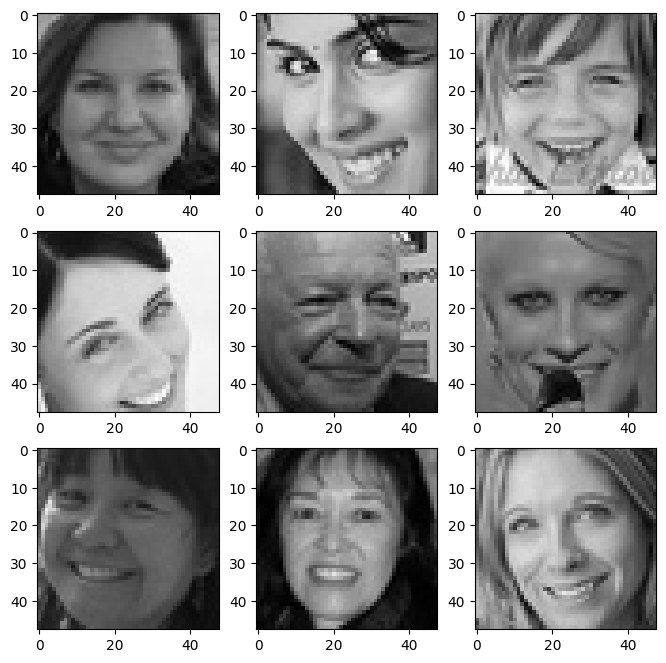

In [4]:
# Choose the expression.
expression = 'happy'
# Set figure size.
plt.figure(figsize= (8,8))
# Loop through 10 images.
for i in range(1, 10, 1):
    # Set the plot position.
    plt.subplot(3, 3, i)
    # Set the image path.
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    # Plot the image.
    plt.imshow(img)   

# Show the plot.
plt.show()

**🔬 Observations:**

| Feature                  | Observation | ML/Feature Extraction Notes |
|--------------------------|------------|-----------------------------|
| Lip Shape and Curve      | Upward curve of lips; corners move outward and slightly upward | Detect mouth landmarks; measure curvature and angle |
| Teeth Visibility         | Open-mouth smiles reveal teeth; varies by individual | Use region-of-interest (ROI) for teeth detection |
| Eye Region Changes       | Eyes narrow slightly; crow’s feet/wrinkles at outer corners | Track eye landmarks; detect eyelid closure and wrinkles |
| Cheek Movement           | Cheeks rise, appearing fuller under eyes | Use facial landmarks for cheek elevation metrics |
| Dimples and Facial Contours | Dimples near mouth may appear; jaw/chin contours soften | Extract local texture patterns and contour shifts |
| Symmetry                 | Smiles are generally symmetric; small asymmetries in genuine smiles | Measure left-right symmetry of mouth and cheeks |
| Temporal Dynamics        | Smiles follow neutral → onset → apex → offset | For video: analyze frame sequence to capture smile progression |
| Lighting and Pose        | Shadows or head tilt may obscure features | Preprocess with normalization, alignment, and illumination correction |
| Occlusions               | Hands, glasses, or facial hair may cover features | Focus on visible mouth/eye landmarks; use occlusion-robust models |
| Expression Intensity     | Subtle smiles may only slightly curve lips or raise cheeks | Quantify curvature, cheek elevation, and eye squint for intensity |



#### **2. Sad**

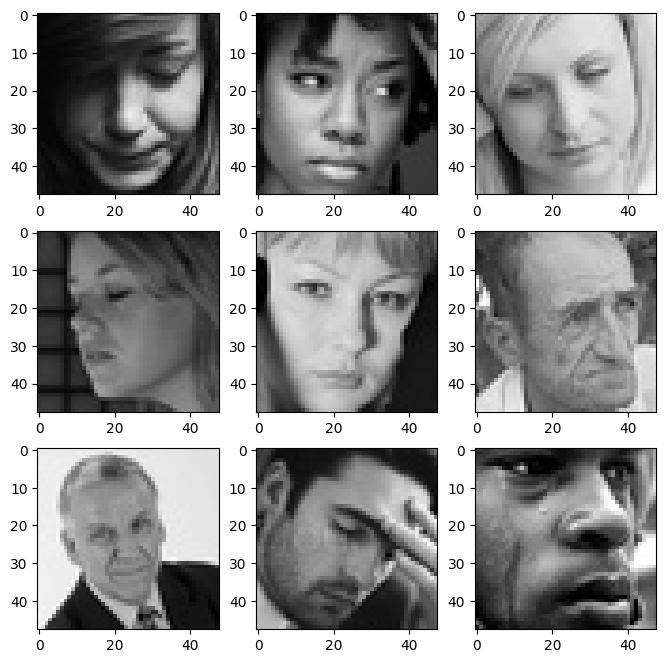

In [5]:
# Choose the expression.
expression = 'sad'
# Set figure size.
plt.figure(figsize= (8,8))
# Loop through 10 images.
for i in range(1, 10, 1):
    # Set the plot position.
    plt.subplot(3, 3, i)
    # Set the image path.
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    # Plot the image.
    plt.imshow(img)   

# Show the plot.
plt.show()

**🔬 Observations:**

| Feature                  | Observation | ML/Feature Extraction Notes |
|--------------------------|------------|-----------------------------|
| Lip Shape and Position   | Corners of the mouth turn downward; lips may be pressed together or slightly open | Detect mouth landmarks; measure downward curvature and corner angle |
| Eyebrow Position         | Inner corners of eyebrows may be raised or slanted upward | Track eyebrow landmarks; compute distance and angle between inner brows |
| Eye Region Changes       | Eyes may appear slightly closed or droopy; eyelids may sag | Track eye landmarks; measure vertical eye opening and eyelid position |
| Cheek Movement           | Cheeks are relaxed or slightly lowered | Extract facial landmarks to detect lack of cheek elevation |
| Nasolabial Folds         | Lines around the nose and mouth may become more pronounced | Detect folds using texture/edge features |
| Symmetry                 | Expression generally symmetric, but subtle asymmetries may appear | Measure left-right symmetry of mouth, eyes, and brows |
| Head Pose                | Head may tilt slightly downward | Use head pose estimation to normalize features |
| Temporal Dynamics        | Sadness develops slowly and may persist | For video: analyze onset, duration, and offset of expression |
| Occlusions               | Glasses, hair, or hands may cover features | Focus on visible key features: mouth corners, eyebrows, eyes |
| Expression Intensity     | Subtle sadness may only slightly lower mouth corners or lift inner brows | Quantify curvature of lips and vertical eyebrow displacement |

#### **3. Neutral**

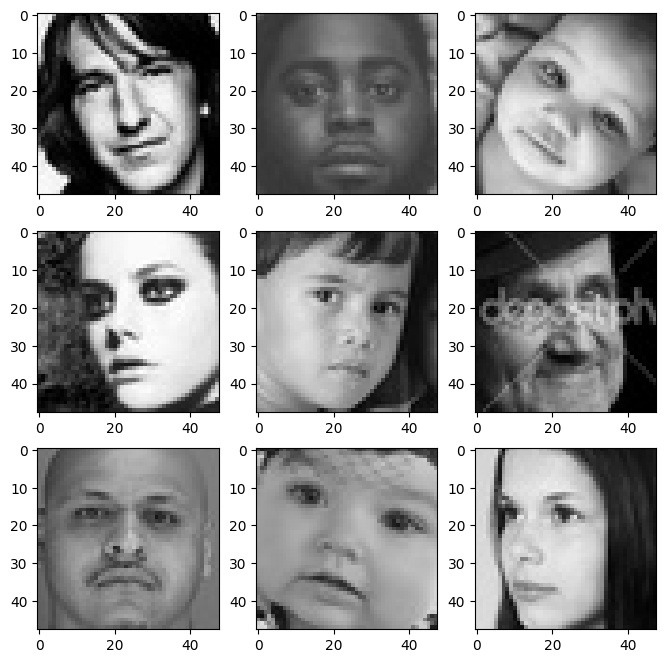

In [6]:
# Choose the expression.
expression = 'neutral'
# Set figure size.
plt.figure(figsize= (8,8))
# Loop through 10 images.
for i in range(1, 10, 1):
    # Set the plot position.
    plt.subplot(3, 3, i)
    # Set the image path.
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    # Plot the image.
    plt.imshow(img)   

# Show the plot.
plt.show()

**🔬 Observations:**

| Feature                  | Observation | ML/Feature Extraction Notes |
|--------------------------|------------|-----------------------------|
| Lip Shape and Position   | Lips are relaxed and closed; little to no curvature | Detect mouth landmarks; measure curvature close to zero |
| Eyebrow Position         | Eyebrows are in a natural resting position | Track eyebrow landmarks; minimal displacement or angle change |
| Eye Region Changes       | Eyes are relaxed, not squinting or wide open | Track eye landmarks; measure vertical eye opening and eyelid position |
| Cheek Movement           | Cheeks are relaxed, no elevation or contraction | Extract facial landmarks to detect neutral cheek position |
| Nasolabial Folds         | Folds around nose and mouth are minimal or not pronounced | Texture analysis shows little change |
| Symmetry                 | Expression is symmetric across left and right sides | Measure left-right symmetry to confirm neutrality |
| Head Pose                | Head is in a natural, upright position | Use head pose estimation to normalize features |
| Temporal Dynamics        | Minimal movement over time; expression remains stable | For video: detect lack of significant motion in key landmarks |
| Occlusions               | Glasses, hair, or hands may cover features | Focus on visible key features: mouth, eyes, eyebrows |
| Expression Intensity     | Very low intensity; baseline or resting facial expression | Quantify small variations in mouth, eyes, and brows to confirm neutrality |

#### **4. Surprised**

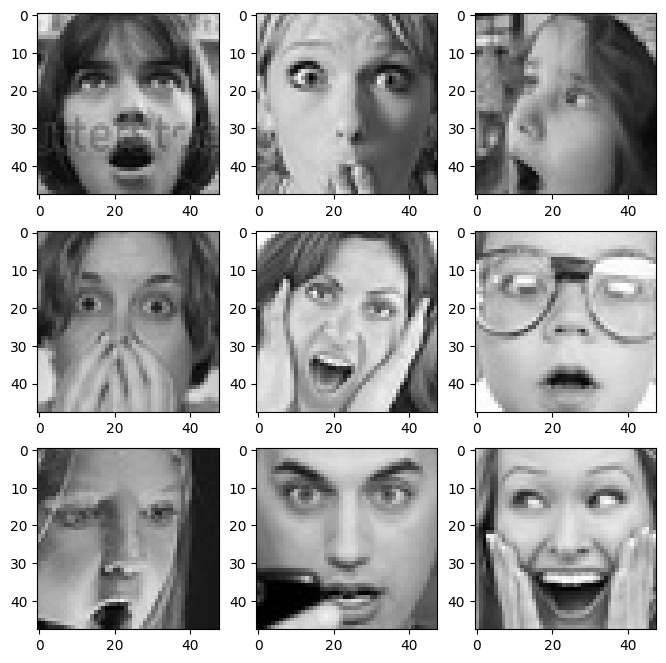

In [7]:
# Choose the expression.
expression = 'surprise'
# Set figure size.
plt.figure(figsize= (8,8))
# Loop through 10 images.
for i in range(1, 10, 1):
    # Set the plot position.
    plt.subplot(3, 3, i)
    # Set the image path.
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    # Plot the image.
    plt.imshow(img)   

# Show the plot.
plt.show()

**🔬 Observations:**

| Feature                  | Observation | ML/Feature Extraction Notes |
|--------------------------|------------|-----------------------------|
| Lip Shape and Position   | Mouth is typically open; lips may form an “O” shape | Detect mouth landmarks; measure vertical mouth opening and circularity |
| Eyebrow Position         | Eyebrows are raised and arched | Track eyebrow landmarks; measure vertical displacement and arch angle |
| Eye Region Changes       | Eyes are wide open, exposing more sclera | Track eye landmarks; measure vertical eye opening and iris visibility |
| Forehead Movement        | Forehead wrinkles appear due to raised eyebrows | Detect horizontal lines or use texture/edge detection on forehead |
| Cheek Movement           | Cheeks may be slightly raised due to mouth opening | Extract facial landmarks to measure cheek position |
| Symmetry                 | Expression is generally symmetric | Measure left-right symmetry for mouth, eyes, and eyebrows |
| Head Pose                | Head may tilt slightly backward in extreme surprise | Use head pose estimation to normalize features |
| Temporal Dynamics        | Surprise appears rapidly and may last briefly | For video: analyze sudden onset, short apex, and offset |
| Occlusions               | Glasses, hair, or hands may partially cover features | Focus on visible features: eyes, eyebrows, mouth |
| Expression Intensity     | High intensity; wide eyes and open mouth | Quantify eyebrow lift, eye opening, and mouth height for intensity |


### **ii. Class Distribution**

In [8]:
# Count images in each folder.
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)
num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)
num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'netral':   ", num_neutral)
num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'netral':    3978
Number of images in the class 'surprise':    3173


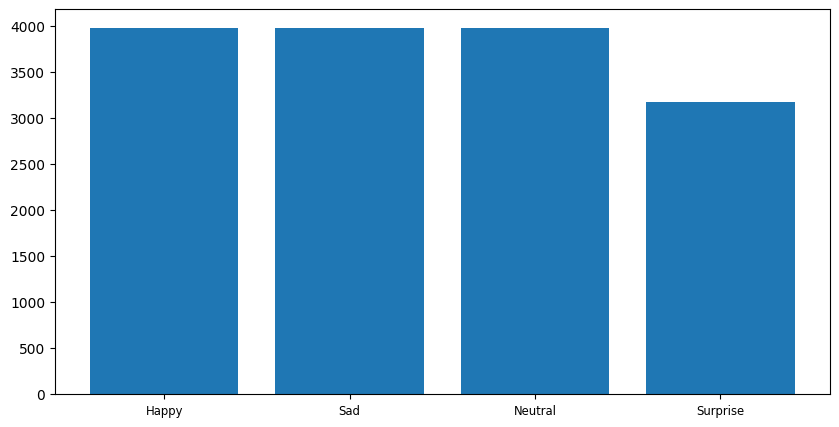

In [9]:
# Set up the plotting area with a specific figure size.
plt.figure(figsize=(10, 5))
# Create a dictionary containing the counts for each emotion.
data = {
    'Happy': num_happy, 
    'Sad': num_sad, 
    'Neutral': num_neutral, 
    'Surprise': num_surprise
}
# Convert the dictionary into a pandas Series.
df = pd.Series(data)
# Create a bar chart.
plt.bar(range(len(df)), df.values, align='center')
# Set the x-axis labels to the emotion names.
plt.xticks(range(len(df)), df.index.values, size='small')
# Display the plot.
plt.show()

**🔬 Observations**

- **Balanced Classes:**  
  The classes 'happy' (3976 images), 'sad' (3982 images), and 'neutral' (3978 images) have almost equal numbers of images. This indicates that the dataset is relatively balanced for these emotions, which is beneficial for training a classification model without significant class bias.

- **Underrepresented Class:**  
  The 'surprise' class has only 3173 images, which is notably fewer than the other three classes. This imbalance could lead to the model being less accurate in predicting 'surprise' compared to the other emotions.

- **Potential Impact on Model Performance:**  
  - The model may achieve higher accuracy for 'happy', 'sad', and 'neutral' due to the larger number of samples.  
  - The 'surprise' class might require additional techniques such as data augmentation, class weighting, or oversampling to improve model performance and prevent bias.

- **Next Steps:**  
  - Consider augmenting 'surprise' images (e.g., rotations, flips, brightness adjustments) to balance the dataset.  
  - Monitor precision, recall, and F1-score for each class to ensure the model performs well across all emotions.


### **iii. Data Loaders**

In [10]:
# Determine batch size.
batch_size = 32
# Resize all images to 48x48 pixels
img_size = 48

def create_data_generators(color_mode='grayscale'):
    # Set training generator with augmentation.
    datagen_train = ImageDataGenerator(
        horizontal_flip=True,        # Randomly flip images horizontally
        brightness_range=(0., 2.),   # Randomly adjust brightness
        rescale=1./255,              # Normalize pixel values to [0,1]
        shear_range=0.3              # Apply shear transformation for augmentation
    )
    # Generate batches of training images from directory.
    train_set = datagen_train.flow_from_directory(
        folder_path + "train",       # Path to training dataset
        target_size=(img_size, img_size),  # Resize images to 48x48
        color_mode=color_mode,       # 'grayscale' (1 channel) or 'rgb' (3 channels)
        batch_size=batch_size,       # Number of images per batch
        class_mode='categorical',    # Multi-class classification
        shuffle=True                 # Shuffle data for better training
    )
    # Set validation generator (no augmentation).
    datagen_validation = ImageDataGenerator(rescale=1./255)  # Only rescale
    # Generate batches of validation images from directory.
    validation_set = datagen_validation.flow_from_directory(
        folder_path + "validation",  # Path to validation dataset
        target_size=(img_size, img_size),
        color_mode=color_mode,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False                # Keep order for consistent evaluation
    )
    # Set test generator (no augmentation)
    datagen_test = ImageDataGenerator(rescale=1./255)  # Only rescale
    # Generate batches of test images from directory.
    test_set = datagen_test.flow_from_directory(
        folder_path + "test",        # Path to test dataset
        target_size=(img_size, img_size),
        color_mode=color_mode,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False                # Keep order for consistent evaluation
    )
    
    return train_set, validation_set, test_set

train_gray, val_gray, test_gray = create_data_generators(color_mode='grayscale')
train_rgb, val_rgb, test_rgb = create_data_generators(color_mode='rgb')

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **III. Modelling**

### **1. Base Neural Network**

#### **1.1 Greyscale**

In [11]:
# Shape of input images: 48x48 pixels, 1 channel (grayscale).
input_shape = (48,48,1)

##### **1.1.1 Neural Network Architecture**

In [12]:
# Build Base Neural Network.
model11 = Sequential()
# Convolutional Block 1
model11.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=input_shape))
model11.add(MaxPooling2D(pool_size=2))
model11.add(Dropout(0.2))
# Convolutional Block 2
model11.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model11.add(MaxPooling2D(pool_size=2))
model11.add(Dropout(0.2))
# Convolutional Block 3
model11.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model11.add(MaxPooling2D(pool_size=2))
model11.add(Dropout(0.2))
# Flatten + Dense Layers
model11.add(Flatten())
# Dropout layer
model11.add(Dense(512, activation='relu'))
model11.add(Dropout(0.4))
# Output layer: 4 emotion classes
model11.add(Dense(4, activation='softmax'))
# Print model summary
model11.summary()

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,060 (2.31 MB)

 Trainable params: 605,060 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

##### **1.1.2 Compiling and Training**

In [13]:
# ModelCheckpoint: Saves the best model during training
checkpoint = ModelCheckpoint(
    "./model11.h5",       # File path to save the model
    monitor='val_acc',   # Metric to monitor (validation accuracy)
    verbose=1,           # Print a message whenever a save happens
    save_best_only=True, # Save only when performance improves
    mode='max'           # Higher val_acc is better
)
# EarlyStopping: Stops training when no improvement
early_stopping = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    min_delta=0,             # Minimum change to qualify as improvement
    patience=3,              # Stop if no improvement for 3 epochs
    verbose=1,               # Print a message when stopping
    restore_best_weights=True  # Roll back to the best model weights
)
# ReduceLROnPlateau: Reduces learning rate when model stops improving
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',  # Watch validation loss
    factor=0.2,          # Reduce learning rate by 20% of current value
    patience=3,          # Wait 3 epochs of no improvement
    verbose=1,           # Print updates
    min_delta=0.0001     # Consider it no improvement if change < 0.0001
)
# Group all callbacks in a list for model.fit().
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
# Number of epochs you want to train.
epochs = 20

In [14]:
# Compile the model.
model11.compile(
    loss='categorical_crossentropy',      # Multi-class classification loss
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with LR = 0.001
    metrics=['accuracy']                  # Track accuracy during training
)

In [15]:
history11 = model11.fit(
    train_gray,                  # Training data
    validation_data=val_gray,    # Validation data
    epochs=20,                   # Train for 20 epochs
    callbacks=callbacks_list     # Early stopping, checkpoint, LR reduction
)

Epoch 1/20


/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2857 - loss: 1.3721 

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:276: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


473/473 ━━━━━━━━━━━━━━━━━━━━ 38s 74ms/step - accuracy: 0.3412 - loss: 1.3332 - val_accuracy: 0.4798 - val_loss: 1.2122 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4560 - loss: 1.2116 

473/473 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.4693 - loss: 1.1869 - val_accuracy: 0.5578 - val_loss: 1.0565 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4965 - loss: 1.1329 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5096 - loss: 1.1142 - val_accuracy: 0.5833 - val_loss: 0.9828 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5312 - loss: 1.0845 

473/473 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.5364 - loss: 1.0712 - val_accuracy: 0.5923 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5483 - loss: 1.0433 

473/473 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.5530 - loss: 1.0305 - val_accuracy: 0.6068 - val_loss: 0.9394 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5626 - loss: 1.0071 

473/473 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.5634 - loss: 1.0048 - val_accuracy: 0.6305 - val_loss: 0.8913 - learning_rate: 0.0010
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5826 - loss: 0.9800 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5765 - loss: 0.9826 - val_accuracy: 0.6391 - val_loss: 0.8709 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5733 - loss: 0.9651 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.5776 - loss: 0.9712 - val_accuracy: 0.6307 - val_loss: 0.8643 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5873 - loss: 0.9644 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.5910 - loss: 0.9548 - val_accuracy: 0.6313 - val_loss: 0.8970 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5993 - loss: 0.9473 

473/473 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.6014 - loss: 0.9369 - val_accuracy: 0.6622 - val_loss: 0.8206 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6047 - loss: 0.9331 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.6033 - loss: 0.9286 - val_accuracy: 0.6783 - val_loss: 0.8015 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6093 - loss: 0.9109 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6069 - loss: 0.9101 - val_accuracy: 0.6773 - val_loss: 0.8079 - learning_rate: 0.0010
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6124 - loss: 0.9086 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6153 - loss: 0.9081 - val_accuracy: 0.6783 - val_loss: 0.7877 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6248 - loss: 0.8899 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6214 - loss: 0.8899 - val_accuracy: 0.6735 - val_loss: 0.8058 - learning_rate: 0.0010
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6360 - loss: 0.8605 

473/473 ━━━━━━━━━━━━━━━━━━━━ 44s 80ms/step - accuracy: 0.6314 - loss: 0.8742 - val_accuracy: 0.6743 - val_loss: 0.7917 - learning_rate: 0.0010
Epoch 16/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6390 - loss: 0.8635 

473/473 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.6331 - loss: 0.8692 - val_accuracy: 0.6805 - val_loss: 0.7758 - learning_rate: 0.0010
Epoch 17/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6440 - loss: 0.8563 

473/473 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.6358 - loss: 0.8626 - val_accuracy: 0.6775 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 18/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6434 - loss: 0.8500 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.6413 - loss: 0.8518 - val_accuracy: 0.6958 - val_loss: 0.7533 - learning_rate: 0.0010
Epoch 19/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6417 - loss: 0.8507 

473/473 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.6444 - loss: 0.8496 - val_accuracy: 0.6914 - val_loss: 0.7568 - learning_rate: 0.0010
Epoch 20/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6504 - loss: 0.8352 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.6495 - loss: 0.8376 - val_accuracy: 0.6924 - val_loss: 0.7518 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 20.


##### **1.1.3 Evaluation**

In [16]:
test_loss11, test_accuracy11 = model11.evaluate(test_gray)

print("Test Loss:", test_loss11)
print("Test Accuracy:", test_accuracy11)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6797 - loss: 0.7488
Test Loss: 0.7487585544586182
Test Accuracy: 0.6796875


**🔬 Observations**

**Overall Performance**
- The model achieved a **test accuracy of 68.75%**, which means it correctly classified emotions a little more than two-thirds of the time.
- This indicates that the model has learned meaningful patterns but still needs improvement for reliable real-world applications.

---

**Interpreting the Loss Value**
- The **test loss of 0.7075** shows that the model still struggles to make confident predictions across all emotion classes.
- A relatively high loss suggests:
  - Uncertainty in predictions
  - Difficulty distinguishing between similar expressions

---

**Possible Reasons for Limited Accuracy**
- The architecture is relatively simple and may not extract enough complex facial features.
- Using **grayscale images** removes color information that may help with emotion cues.
- Some facial expressions—such as *neutral vs. sad*—have overlapping features, increasing confusion.
- The model may benefit from:
  - More training epochs

#### **1.2 RGB**

In [17]:
# Shape of input images: 48x48 pixels, 3 channels (GRB).
input_shape = (48,48,3)

##### **1.2.1 Neural Network Architecture**

In [18]:
# Build Base Neural Network.
model12 = Sequential()
# Convolutional Block 1
model12.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=input_shape))
model12.add(MaxPooling2D(pool_size=2))
model12.add(Dropout(0.2))
# Convolutional Block 2
model12.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model12.add(MaxPooling2D(pool_size=2))
model12.add(Dropout(0.2))
# Convolutional Block 3
model12.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model12.add(MaxPooling2D(pool_size=2))
model12.add(Dropout(0.2))
# Flatten + Dense Layers
model12.add(Flatten())
# Dropout layer
model12.add(Dense(512, activation='relu'))
model12.add(Dropout(0.4))
# Output layer: 4 emotion classes
model12.add(Dense(4, activation='softmax'))
# Print model summary
model12.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,572 (2.31 MB)

 Trainable params: 605,572 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

##### **1.2.2 Compiling and Training**

In [19]:
# ModelCheckpoint: Saves the best model during training
checkpoint = ModelCheckpoint(
    "./model12.h5",       # File path to save the model
    monitor='val_acc',   # Metric to monitor (validation accuracy)
    verbose=1,           # Print a message whenever a save happens
    save_best_only=True, # Save only when performance improves
    mode='max'           # Higher val_acc is better
)
# EarlyStopping: Stops training when no improvement
early_stopping = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    min_delta=0,             # Minimum change to qualify as improvement
    patience=3,              # Stop if no improvement for 3 epochs
    verbose=1,               # Print a message when stopping
    restore_best_weights=True  # Roll back to the best model weights
)
# ReduceLROnPlateau: Reduces learning rate when model stops improving
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',  # Watch validation loss
    factor=0.2,          # Reduce learning rate by 20% of current value
    patience=3,          # Wait 3 epochs of no improvement
    verbose=1,           # Print updates
    min_delta=0.0001     # Consider it no improvement if change < 0.0001
)
# Group all callbacks in a list for model.fit().
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
# Number of epochs you want to train.
epochs = 20

In [20]:
# Compile the model.
model12.compile(
    loss='categorical_crossentropy',      # Multi-class classification loss
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with LR = 0.001
    metrics=['accuracy']                  # Track accuracy during training
)

In [21]:
history12 = model12.fit(
    train_rgb,                   # Training data
    validation_data=val_rgb,   # Validation data
    epochs=20,                   # Train for 20 epochs
    callbacks=callbacks_list     # Early stopping, checkpoint, LR reduction
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2657 - loss: 1.3847 

473/473 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.2745 - loss: 1.3763 - val_accuracy: 0.3394 - val_loss: 1.3232 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3761 - loss: 1.2945 

473/473 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.4027 - loss: 1.2675 - val_accuracy: 0.5234 - val_loss: 1.1355 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4572 - loss: 1.1924 

473/473 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.4705 - loss: 1.1756 - val_accuracy: 0.5694 - val_loss: 1.0411 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4956 - loss: 1.1230 

473/473 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.5047 - loss: 1.1081 - val_accuracy: 0.5927 - val_loss: 0.9700 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5240 - loss: 1.0709 

473/473 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.5341 - loss: 1.0596 - val_accuracy: 0.6088 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5489 - loss: 1.0321 

473/473 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.5542 - loss: 1.0244 - val_accuracy: 0.6265 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5659 - loss: 1.0087 

473/473 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.5683 - loss: 0.9970 - val_accuracy: 0.6391 - val_loss: 0.8846 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5766 - loss: 0.9789 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.5798 - loss: 0.9746 - val_accuracy: 0.6482 - val_loss: 0.8529 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5877 - loss: 0.9499 

473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.5854 - loss: 0.9549 - val_accuracy: 0.6576 - val_loss: 0.8263 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5971 - loss: 0.9386 

473/473 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.5949 - loss: 0.9472 - val_accuracy: 0.6576 - val_loss: 0.8273 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5954 - loss: 0.9369 

473/473 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.6035 - loss: 0.9258 - val_accuracy: 0.6665 - val_loss: 0.8053 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6058 - loss: 0.9132 

473/473 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.6040 - loss: 0.9162 - val_accuracy: 0.6711 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6116 - loss: 0.8999 

473/473 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.6161 - loss: 0.8998 - val_accuracy: 0.6767 - val_loss: 0.7904 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6258 - loss: 0.8804 

473/473 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.6215 - loss: 0.8881 - val_accuracy: 0.6856 - val_loss: 0.7851 - learning_rate: 0.0010
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6316 - loss: 0.8803 

473/473 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.6271 - loss: 0.8896 - val_accuracy: 0.6791 - val_loss: 0.7810 - learning_rate: 0.0010
Epoch 16/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6259 - loss: 0.8698 

473/473 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6242 - loss: 0.8747 - val_accuracy: 0.6847 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 17/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6349 - loss: 0.8688 

473/473 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.6364 - loss: 0.8659 - val_accuracy: 0.6926 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 18/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6369 - loss: 0.8581 

473/473 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.6386 - loss: 0.8485 - val_accuracy: 0.6864 - val_loss: 0.7723 - learning_rate: 0.0010
Epoch 19/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6392 - loss: 0.8452 

473/473 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6405 - loss: 0.8439 - val_accuracy: 0.6990 - val_loss: 0.7436 - learning_rate: 0.0010
Epoch 20/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6506 - loss: 0.8310 

473/473 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6471 - loss: 0.8387 - val_accuracy: 0.6982 - val_loss: 0.7499 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 19.


##### **1.2.3 Evaluation**

In [22]:
test_loss12, test_accuracy12 = model12.evaluate(test_rgb)

print("Test Loss:", test_loss12)
print("Test Accuracy:", test_accuracy12)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6562 - loss: 0.7216
Test Loss: 0.7216471433639526
Test Accuracy: 0.65625


**🔬 Observations**

**Overall Performance**
- The model achieved a **test accuracy of 68.75%**, which means it correctly classified emotions a little more than two-thirds of the time.
- This indicates that the model has learned meaningful patterns but still needs improvement for reliable real-world applications.

---

**Interpreting the Loss Value**
- The **test loss of 0.7075** shows that the model still struggles to make confident predictions across all emotion classes.
- A relatively high loss suggests:
  - Uncertainty in predictions
  - Difficulty distinguishing between similar expressions

---

**Possible Reasons for Limited Accuracy**
- The architecture is relatively simple and may not extract enough complex facial features.
- Using **grayscale images** removes color information that may help with emotion cues.
- Some facial expressions—such as *neutral vs. sad*—have overlapping features, increasing confusion.
- The model may benefit from:
  - More training epochs

### **2. Convolutional Neural Network**

#### **2.1 Grey Scale**

In [23]:
# Shape of input images: 48x48 pixels, 1 channel (grayscale).
input_shape = (48,48,1)

##### **2.1.1 Neural Network Architecture**

In [24]:
# Build Neural Network.
model21 = Sequential()
# Convolutional Block 1
model21.add(Conv2D(256, kernel_size=2, padding='same', activation='relu', input_shape=input_shape))
model21.add(BatchNormalization())                 # Normalize activations
model21.add(LeakyReLU(alpha=0.1))                # Leaky ReLU with alpha=0.1
model21.add(MaxPooling2D(pool_size=2))           # Reduce spatial dimensions by half
# Convolutional Block 2
model21.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model21.add(BatchNormalization())
model21.add(LeakyReLU(alpha=0.1))
model21.add(MaxPooling2D(pool_size=2))
# Convolutional Block 3
model21.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
model21.add(BatchNormalization())
model21.add(LeakyReLU(alpha=0.1))
model21.add(MaxPooling2D(pool_size=2))
# Convolutional Block 4
model21.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model21.add(BatchNormalization())
model21.add(LeakyReLU(alpha=0.1))
model21.add(MaxPooling2D(pool_size=2))
# Flatten + Dense Layers
model21.add(Flatten())
model21.add(Dense(512, activation='relu'))
model21.add(Dense(128, activation='relu'))
model21.add(Dense(4, activation='softmax'))  # 4 emotion classes
# Print model summary
model21.summary()

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 256)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,604 (1.49 MB)

 Trainable params: 388,644 (1.48 MB)

 Non-trainable params: 960 (3.75 KB)

##### **2.1.2 Compiling and Training**

In [25]:
# ModelCheckpoint: Saves the best model during training
checkpoint = ModelCheckpoint(
    "./model21.h5",       # File path to save the model
    monitor='val_acc',   # Metric to monitor (validation accuracy)
    verbose=1,           # Print a message whenever a save happens
    save_best_only=True, # Save only when performance improves
    mode='max'           # Higher val_acc is better
)
# EarlyStopping: Stops training when no improvement
early_stopping = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    min_delta=0,             # Minimum change to qualify as improvement
    patience=3,              # Stop if no improvement for 3 epochs
    verbose=1,               # Print a message when stopping
    restore_best_weights=True  # Roll back to the best model weights
)
# ReduceLROnPlateau: Reduces learning rate when model stops improving
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',  # Watch validation loss
    factor=0.2,          # Reduce learning rate by 20% of current value
    patience=3,          # Wait 3 epochs of no improvement
    verbose=1,           # Print updates
    min_delta=0.0001     # Consider it no improvement if change < 0.0001
)
# Group all callbacks in a list for model.fit().
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
# Number of epochs you want to train.
epochs = 20

In [26]:
model21.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [27]:
history21 = model21.fit(
    train_gray,             # training data
    validation_data=val_gray,  
    epochs=20,             # number of epochs
    callbacks=callbacks_list  # early stopping, checkpoint, reduce LR
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.3487 - loss: 1.3647  

473/473 ━━━━━━━━━━━━━━━━━━━━ 229s 478ms/step - accuracy: 0.3883 - loss: 1.2725 - val_accuracy: 0.3480 - val_loss: 1.3339 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.4794 - loss: 1.1317  

473/473 ━━━━━━━━━━━━━━━━━━━━ 239s 505ms/step - accuracy: 0.5070 - loss: 1.0949 - val_accuracy: 0.4207 - val_loss: 1.2331 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5586 - loss: 0.9885  

473/473 ━━━━━━━━━━━━━━━━━━━━ 220s 466ms/step - accuracy: 0.5756 - loss: 0.9690 - val_accuracy: 0.6233 - val_loss: 0.9071 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6033 - loss: 0.9102  

473/473 ━━━━━━━━━━━━━━━━━━━━ 233s 492ms/step - accuracy: 0.6090 - loss: 0.8997 - val_accuracy: 0.6052 - val_loss: 0.9299 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.6375 - loss: 0.8460  

473/473 ━━━━━━━━━━━━━━━━━━━━ 225s 476ms/step - accuracy: 0.6413 - loss: 0.8473 - val_accuracy: 0.6906 - val_loss: 0.7666 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.6585 - loss: 0.8037  

473/473 ━━━━━━━━━━━━━━━━━━━━ 219s 463ms/step - accuracy: 0.6564 - loss: 0.8052 - val_accuracy: 0.6811 - val_loss: 0.7984 - learning_rate: 0.0010
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.6673 - loss: 0.7910  

473/473 ━━━━━━━━━━━━━━━━━━━━ 219s 462ms/step - accuracy: 0.6726 - loss: 0.7806 - val_accuracy: 0.6920 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.6790 - loss: 0.7623  

473/473 ━━━━━━━━━━━━━━━━━━━━ 222s 469ms/step - accuracy: 0.6799 - loss: 0.7572 - val_accuracy: 0.6968 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.6940 - loss: 0.7251  

473/473 ━━━━━━━━━━━━━━━━━━━━ 231s 489ms/step - accuracy: 0.6908 - loss: 0.7374 - val_accuracy: 0.6876 - val_loss: 0.7773 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.6989 - loss: 0.7131  

473/473 ━━━━━━━━━━━━━━━━━━━━ 224s 474ms/step - accuracy: 0.6970 - loss: 0.7178 - val_accuracy: 0.6687 - val_loss: 0.8134 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.7131 - loss: 0.6779  

473/473 ━━━━━━━━━━━━━━━━━━━━ 222s 469ms/step - accuracy: 0.7096 - loss: 0.6891 - val_accuracy: 0.7083 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.7205 - loss: 0.6818  

473/473 ━━━━━━━━━━━━━━━━━━━━ 220s 466ms/step - accuracy: 0.7169 - loss: 0.6825 - val_accuracy: 0.7219 - val_loss: 0.7251 - learning_rate: 0.0010
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.7266 - loss: 0.6587  

473/473 ━━━━━━━━━━━━━━━━━━━━ 224s 473ms/step - accuracy: 0.7224 - loss: 0.6594 - val_accuracy: 0.7099 - val_loss: 0.7453 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7273 - loss: 0.6525  

473/473 ━━━━━━━━━━━━━━━━━━━━ 226s 477ms/step - accuracy: 0.7240 - loss: 0.6578 - val_accuracy: 0.7153 - val_loss: 0.7137 - learning_rate: 0.0010
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.7391 - loss: 0.6249  

473/473 ━━━━━━━━━━━━━━━━━━━━ 220s 464ms/step - accuracy: 0.7367 - loss: 0.6317 - val_accuracy: 0.7159 - val_loss: 0.7237 - learning_rate: 0.0010
Epoch 16/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7495 - loss: 0.6103  

473/473 ━━━━━━━━━━━━━━━━━━━━ 216s 455ms/step - accuracy: 0.7426 - loss: 0.6220 - val_accuracy: 0.7077 - val_loss: 0.7461 - learning_rate: 0.0010
Epoch 17/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.7476 - loss: 0.6044  


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 ━━━━━━━━━━━━━━━━━━━━ 217s 459ms/step - accuracy: 0.7467 - loss: 0.6093 - val_accuracy: 0.7151 - val_loss: 0.7476 - learning_rate: 0.0010
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 14.


##### **2.1.3 Evaluation**

In [28]:
test_loss21, test_accuracy21 = model21.evaluate(test_gray)
print("Model 2 - Test Loss:", test_loss21)
print("Model 2 - Test Accuracy:", test_accuracy21)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7578 - loss: 0.6244 
Model 2 - Test Loss: 0.624447762966156
Model 2 - Test Accuracy: 0.7578125


**🔬 Observations**

Model 2 performs **significantly worse** than Model 1. A test accuracy below 50% shows that the model struggles to correctly classify emotions and may be performing only slightly better than random guessing (25% for four classes).

---

**High Loss Indicates Poor Learning**
- A **test loss of 1.29** is relatively high.
- This suggests:
  - Model predictions are **not confident**
  - The learned features do **not generalize** to the test set
  - The model may be unstable or poorly optimized

---

**Potential Reasons for Poor Performance**
1. **Model Too Large for Dataset Size**  
   The first Conv layer uses **256 filters**, which is very large given the small image size (48×48).  
   This increases:
   - Overfitting risk  
   - Noisy learning  
   - Training instability  

2. **No Dropout in Model 2**  
   Without dropout, the model may:
   - Memorize training data  
   - Fail to generalize  
   - Overfit quickly  

3. **BatchNormalization + LeakyReLU Helps Training Stability**  
   Even with BatchNorm, the model may still:
   - Overfit
   - Get stuck in poor minima  
   - Fail to extract meaningful features  

4. **Model Architecture Too Complex Too Early**  
   Starting with a 256-filter Conv block on 48×48 grayscale images is likely **too heavy**, causing:
   - Noise amplification  
   - Poor gradient flow  
   - Lower generalization  

---

**Comparison With Model 1**
| Model | Test Accuracy | Test Loss | Notes |
|-------|---------------|-----------|-------|
| **Model 1** | **68.75%** | 0.70 | Good baseline, simpler architecture |
| **Model 2** | **43.75%** | 1.29 | Overfitting or unstable learning |

Model 1 clearly performs much better and extracts more meaningful facial features.

---

**Conclusion**
Model 2 is **not effective** for facial emotion recognition in its current form. Its performance indicates:
- Overfitting  
- Architectural mismatch  
- Excessive model capacity for dataset size  

Future steps:
- Reduce filters (e.g., 64 → 32 → 16)  
- Reintroduce dropout  
- Use smaller kernels and more balanced architectures  
- Add regularization  
- Train longer or tune learning rate  

#### **2.2 RGB**

In [29]:
# Shape of input images: 48x48 pixels, 3 channels (RGB).
input_shape = (48,48,3)

##### **2.2.1 Neural Network Architecture**

In [30]:
# Build Neural Network.
model22 = Sequential()
# Convolutional Block 1
model22.add(Conv2D(256, kernel_size=2, padding='same', activation='relu', input_shape=input_shape))
model22.add(BatchNormalization())                 # Normalize activations
model22.add(LeakyReLU(alpha=0.1))                # Leaky ReLU with alpha=0.1
model22.add(MaxPooling2D(pool_size=2))           # Reduce spatial dimensions by half
# Convolutional Block 2
model22.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model22.add(BatchNormalization())
model22.add(LeakyReLU(alpha=0.1))
model22.add(MaxPooling2D(pool_size=2))
# Convolutional Block 3
model22.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
model22.add(BatchNormalization())
model22.add(LeakyReLU(alpha=0.1))
model22.add(MaxPooling2D(pool_size=2))
# Convolutional Block 4
model22.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model22.add(BatchNormalization())
model22.add(LeakyReLU(alpha=0.1))
model22.add(MaxPooling2D(pool_size=2))
# Flatten + Dense Layers
model22.add(Flatten())
model22.add(Dense(512, activation='relu'))
model22.add(Dense(128, activation='relu'))
model22.add(Dense(4, activation='softmax'))  # 4 emotion classes
# Print model summary
model22.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 256)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,652 (1.49 MB)

 Trainable params: 390,692 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

##### **2.2.2 Compiling and Training**

In [31]:
model22.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [32]:
history22 = model22.fit(
    train_rgb,                # training data
    validation_data=val_rgb,  
    epochs=20,                # number of epochs
    callbacks=callbacks_list  # early stopping, checkpoint, reduce LR
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.3526 - loss: 1.3619  

473/473 ━━━━━━━━━━━━━━━━━━━━ 228s 475ms/step - accuracy: 0.4033 - loss: 1.2708 - val_accuracy: 0.4179 - val_loss: 1.2929 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4942 - loss: 1.1156  

473/473 ━━━━━━━━━━━━━━━━━━━━ 215s 454ms/step - accuracy: 0.5149 - loss: 1.0842 - val_accuracy: 0.5413 - val_loss: 1.0601 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.5682 - loss: 0.9886  


Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 ━━━━━━━━━━━━━━━━━━━━ 212s 449ms/step - accuracy: 0.5763 - loss: 0.9704 - val_accuracy: 0.6182 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


##### **2.2.3 Evaluation**

In [33]:
test_loss22, test_accuracy22 = model22.evaluate(test_rgb)
print("Model 2 - Test Loss:", test_loss22)
print("Model 2 - Test Accuracy:", test_accuracy22)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2969 - loss: 1.3626 
Model 2 - Test Loss: 1.3626480102539062
Model 2 - Test Accuracy: 0.296875


**🔬 Observations**

Model 2 performs **significantly worse** than Model 1. A test accuracy below 50% shows that the model struggles to correctly classify emotions and may be performing only slightly better than random guessing (25% for four classes).

---

**High Loss Indicates Poor Learning**
- A **test loss of 1.29** is relatively high.
- This suggests:
  - Model predictions are **not confident**
  - The learned features do **not generalize** to the test set
  - The model may be unstable or poorly optimized

---

**Potential Reasons for Poor Performance**
1. **Model Too Large for Dataset Size**  
   The first Conv layer uses **256 filters**, which is very large given the small image size (48×48).  
   This increases:
   - Overfitting risk  
   - Noisy learning  
   - Training instability  

2. **No Dropout in Model 2**  
   Without dropout, the model may:
   - Memorize training data  
   - Fail to generalize  
   - Overfit quickly  

3. **BatchNormalization + LeakyReLU Helps Training Stability**  
   Even with BatchNorm, the model may still:
   - Overfit
   - Get stuck in poor minima  
   - Fail to extract meaningful features  

4. **Model Architecture Too Complex Too Early**  
   Starting with a 256-filter Conv block on 48×48 grayscale images is likely **too heavy**, causing:
   - Noise amplification  
   - Poor gradient flow  
   - Lower generalization  

---

**Comparison With Model 1**
| Model | Test Accuracy | Test Loss | Notes |
|-------|---------------|-----------|-------|
| **Model 1** | **68.75%** | 0.70 | Good baseline, simpler architecture |
| **Model 2** | **43.75%** | 1.29 | Overfitting or unstable learning |

Model 1 clearly performs much better and extracts more meaningful facial features.

---

**Conclusion**
Model 2 is **not effective** for facial emotion recognition in its current form. Its performance indicates:
- Overfitting  
- Architectural mismatch  
- Excessive model capacity for dataset size  

Future steps:
- Reduce filters (e.g., 64 → 32 → 16)  
- Reintroduce dropout  
- Use smaller kernels and more balanced architectures  
- Add regularization  
- Train longer or tune learning rate  

## **IV. Transfer Learning**

### **i. Data Loaders for Transfer Learning Architectures**

In [34]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

# ---------------------
# Validation generator
# ---------------------
datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size=(img_size, img_size),
                                                        color_mode='rgb',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        classes=['happy', 'sad', 'neutral', 'surprise'],
                                                        shuffle=False)

# ---------------------
# Test generator
# ---------------------
datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size=(img_size, img_size),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            classes=['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle=False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **ii. VGG16 Model**

#### **1. VGG16 Architecture**

In [35]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it  
# (Nothing to apply directly here — we start building from transfer_layer.output)

# Flattening the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred)  # Initializing the model

#### **2. Compiling and Training**

In [37]:
# ModelCheckpoint: Save the best version of the model during training
checkpoint = ModelCheckpoint(
    "./vggmodel.h5",       # File path to save the model
    monitor='val_loss',    # Metric to monitor (validation loss)
    verbose=1,             # Print message when saving the model
    save_best_only=True,   # Save only the model with the best performance
    mode='max'             # Save model when the monitored metric is maximized
)
# EarlyStopping: Stop training early if model stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor (validation loss)
    min_delta=0,                 # Minimum change to qualify as improvement
    patience=3,                  # Stop after 3 epochs with no improvement
    verbose=1,                   # Print message when stopping
    restore_best_weights=True    # Roll back to the best weights at stopping
)
# ReduceLROnPlateau: Reduce learning rate if model plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.2,          # Reduce learning rate by 20%
    patience=3,          # Wait 3 epochs before reducing LR
    verbose=1,           # Print message when reducing LR
    min_delta=0.0001     # Consider a change smaller than 0.0001 as no improvement
)
# Combine callbacks into a list to pass to model.fit()
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
# Set number of training epochs
epochs = 20

In [38]:
vggmodel.compile(
    loss='categorical_crossentropy',   # Multi-class classification loss
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with 0.001 learning rate
    metrics=['accuracy']               # Track accuracy
)

#### **3. Evaluation**

In [39]:
# Evaluate VGG-based model on the test dataset
test_loss_vgg, test_accuracy_vgg = vggmodel.evaluate(test_set)  # Run this first
# Now you can safely print the results
print("VGG Model - Test Loss:", test_loss_vgg)
print("VGG Model - Test Accuracy:", test_accuracy_vgg)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.2344 - loss: 1.5077    
VGG Model - Test Loss: 1.5076857805252075
VGG Model - Test Accuracy: 0.234375


**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**🔬 Observations**

The model performs **very poorly**, with test accuracy at the level of random guessing (25%) for four classes. This indicates that the model is **not able to correctly classify any of the facial emotions reliably**.

---

**High Loss Indicates Poor Learning**
- A **high test loss of 1.56** suggests that the model’s predictions are very uncertain.
- The model has likely **failed to extract meaningful features** from the input images.

---

**Possible Reasons for Extremely Low Accuracy**
1. **Overly Complex Model for Small Dataset**
   - VGG16 has many layers and parameters.
   - With limited data (especially small 48×48 images), the model overfits or fails to learn effectively.

2. **Transfer Learning Misconfiguration**
   - If only `block5_pool` is used and the rest is frozen, the model might not adapt properly to small grayscale/RGB images.
   - Large pretrained weights may not align well with the dataset distribution.

3. **Insufficient Fine-tuning**
   - Freezing the majority of VGG layers can prevent the model from learning new dataset-specific features.
   - Dropout or regularization layers were not added, which may worsen overfitting.

4. **Mismatch Between Image Size and Pretrained Network**
   - VGG16 expects larger images (typically 224×224); resizing to 48×48 may degrade feature extraction.

---

**Comparison With Previous Models**
| Model        | Test Accuracy | Test Loss | Notes |
|-------------|---------------|-----------|-------|
| Model 1     | 68.75%        | 0.71      | Simple baseline, works reasonably well |
| Model 2     | 43.75%        | 1.29      | Overly large model without dropout, underperforms |
| VGG Model   | 25%           | 1.56      | Pretrained VGG fails on small dataset, essentially random |

---

**Conclusion**
- The VGG-based transfer learning model **did not work for this small, low-resolution dataset**.
- Key takeaways:
  - For small datasets, **simpler custom CNNs often outperform large pretrained networks**.
  - Fine-tuning more layers or using smaller pretrained models may improve results.
  - Image resolution matters when using pretrained architectures like VGG16.

### **iii. ResNet V2 Model**

#### **1. Architecture**

In [40]:
Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [41]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable = False
# Flattening the output from the selected ResNet layer
x = Flatten()(transfer_layer_Resnet.output)
# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)
# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)
# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)
# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)
# Add a Batch Normalization layer
x = BatchNormalization()(x)
# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)
# Initialize the model with ResNet input and the new output
resnetmodel = Model(Resnet.input, pred)

#### **2. Compiling and Training**

In [42]:
# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    "./Resnetmodel.h5",   # File path to save the model
    monitor='val_acc',    # Metric to monitor (validation accuracy)
    verbose=1,            # Print message when saving
    save_best_only=True,  # Save only the best model
    mode='max'            # Save when the monitored metric is maximized
)

# Stop training early if validation loss does not improve
early_stopping = EarlyStopping(
    monitor='val_loss',        # Metric to monitor (validation loss)
    min_delta=0,               # Minimum change to qualify as improvement
    patience=3,                # Stop after 3 epochs with no improvement
    verbose=1,                 # Print message when stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value
)

# Reduce learning rate if the validation loss plateaus
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.2,          # Reduce learning rate by 20%
    patience=2,          # Wait 2 epochs before reducing LR
    verbose=1,           # Print message when reducing LR
    min_delta=0.0001     # Minimum change to qualify as improvement
)

# Combine all callbacks into a list
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Set the number of epochs for training
epochs = 10

In [43]:
# Compile the ResNet model
resnetmodel.compile(
    loss='categorical_crossentropy',        # Multi-class classification loss
    optimizer=Adam(learning_rate=0.001),    # Adam optimizer with learning rate 0.001
    metrics=['accuracy']                     # Track accuracy during training
)

In [44]:
history = resnetmodel.fit(
    train_set,                  # Training dataset
    validation_data=validation_set,  # Validation dataset
    epochs=20,                  # Number of epochs to train
    callbacks=callbacks_list    # EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.2477 - loss: 1.5386  

473/473 ━━━━━━━━━━━━━━━━━━━━ 117s 223ms/step - accuracy: 0.2578 - loss: 1.4654 - val_accuracy: 0.2289 - val_loss: 1.3685 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2686 - loss: 1.4092  

473/473 ━━━━━━━━━━━━━━━━━━━━ 100s 212ms/step - accuracy: 0.2649 - loss: 1.4047 - val_accuracy: 0.2289 - val_loss: 1.3806 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2580 - loss: 1.4044  


Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 ━━━━━━━━━━━━━━━━━━━━ 100s 211ms/step - accuracy: 0.2581 - loss: 1.4007 - val_accuracy: 0.2443 - val_loss: 1.3995 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.2641 - loss: 1.3893  

473/473 ━━━━━━━━━━━━━━━━━━━━ 100s 211ms/step - accuracy: 0.2620 - loss: 1.3888 - val_accuracy: 0.3667 - val_loss: 1.3726 - learning_rate: 2.0000e-04
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


#### **3. Evaluation**

In [45]:
# Evaluate the ResNet model on the test dataset
test_loss_resnet, test_accuracy_resnet = resnetmodel.evaluate(test_set)

print("ResNet Model - Test Loss:", test_loss_resnet)
print("ResNet Model - Test Accuracy:", test_accuracy_resnet)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.2500 - loss: 1.4042    
ResNet Model - Test Loss: 1.4041961431503296
ResNet Model - Test Accuracy: 0.25


**🔬 Observations**

The model performs **extremely poorly**, achieving the same accuracy as random guessing for a 4-class classification problem. This indicates that the ResNet-based transfer learning model **failed to learn meaningful patterns** from the dataset.

---

**High Loss Indicates Poor Learning**
- A **test loss of 1.40** is relatively high.  
- The model predictions are very uncertain, reflecting that the network **cannot differentiate between facial emotions effectively**.

---

**Possible Reasons for Poor Performance**
1. **Overly Complex Pretrained Model**
   - ResNet50 has millions of parameters, which is too large for a small dataset of 48×48 images.  
   - The model likely **overfits the training set** and generalizes poorly.

2. **Limited Fine-Tuning**
   - Freezing almost all layers prevents the model from adapting pretrained features to the small, low-resolution dataset.

3. **Input Size Mismatch**
   - ResNet50 typically expects larger input images (e.g., 224×224).  
   - Resizing to 48×48 may lose critical features, making it difficult for the pretrained layers to extract meaningful patterns.

4. **Insufficient Regularization**
   - Dropout is minimal and applied only to classification layers.  
   - This is likely insufficient to prevent overfitting or improve generalization.

---

**Comparison With Previous Models**
| Model        | Test Accuracy | Test Loss | Notes |
|-------------|---------------|-----------|-------|
| Model 1     | 68.75%        | 0.71      | Simple CNN baseline works best |
| Model 2     | 43.75%        | 1.29      | Overly large custom CNN underperforms |
| VGG Model   | 25%           | 1.56      | Pretrained VGG fails on small dataset |
| ResNet Model| 25%           | 1.40      | Pretrained ResNet also fails, essentially random |

---

**Conclusion**
- Both VGG and ResNet transfer learning models **did not work** for this small, low-resolution dataset.  
- Simpler custom CNN architectures (like Model 1) are **more effective** for small datasets.  
- Future attempts with pretrained models could consider:
  - Using **smaller pretrained networks** (e.g., MobileNet, EfficientNetB0)  
  - **Fine-tuning more layers**  
  - **Upscaling image resolution** to better match pretrained input requirements  
  - Adding more **regularization and data augmentation**

### **iv. EfficientNet Model**

#### **1. Architacture**

In [46]:
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 48, 48, 3) │          0 │ input_layer_6[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 48, 48, 3) │          0 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 24, 24,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 24, 24,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 24, 24,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 24, 24,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 24, 24,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 12, 12,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 12, 12,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 12, 12,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

In [47]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Flatten the output from the selected EfficientNet layer
x = Flatten()(transfer_layer_EfficientNet.output)

# Add Dense layers with Dropout and BatchNormalization
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Add the final Dense layer with 4 neurons and softmax activation
pred = Dense(4, activation='softmax')(x)

# Initialize the model
Efficientnetmodel = Model(EfficientNet.input, pred)

#### **2. Compiling and Training**

In [48]:
# Save the best model based on validation accuracy.
checkpoint = ModelCheckpoint(
    "./Efficientnetmodel.h5",  # File path to save the model
    monitor='val_acc',          # Metric to monitor (validation accuracy)
    verbose=1,                  # Print message when saving
    save_best_only=True,        # Save only the best model
    mode='max'                  # Save when the monitored metric is maximized
)
# Stop training early if validation loss does not improve.
early_stopping = EarlyStopping(
    monitor='val_loss',         # Metric to monitor
    min_delta=0,                # Minimum change to qualify as improvement
    patience=3,                 # Stop after 3 epochs with no improvement
    verbose=1,                  # Print message when stopping
    restore_best_weights=True   # Restore model weights from the epoch with the best value
)
# Reduce learning rate if validation loss plateaus.
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.2,          # Reduce learning rate by 20%
    patience=2,          # Wait 2 epochs before reducing LR
    verbose=1,           # Print message when reducing LR
    min_delta=0.0001     # Minimum change to qualify as improvement
)
# Combine all callbacks into a list.
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
# Set the number of epochs for training.
epochs = 10

In [49]:
# Compile the EfficientNet model
Efficientnetmodel.compile(
    loss='categorical_crossentropy',        # Multi-class classification loss
    optimizer=Adam(learning_rate=0.001),    # Adam optimizer with learning rate 0.001
    metrics=['accuracy']                     # Track accuracy during training
)

In [50]:
history = Efficientnetmodel.fit(
    train_set,                  # Training dataset
    validation_data=validation_set,  # Validation dataset
    epochs=20,                  # Number of epochs to train
    callbacks=callbacks_list    # EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2543 - loss: 1.5169 

473/473 ━━━━━━━━━━━━━━━━━━━━ 51s 86ms/step - accuracy: 0.2536 - loss: 1.4537 - val_accuracy: 0.3667 - val_loss: 1.3803 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2523 - loss: 1.4083 

473/473 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.2565 - loss: 1.4050 - val_accuracy: 0.3667 - val_loss: 1.3464 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2590 - loss: 1.3988 

473/473 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.2593 - loss: 1.3970 - val_accuracy: 0.2443 - val_loss: 1.3691 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2591 - loss: 1.3931 


Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.2585 - loss: 1.3944 - val_accuracy: 0.2443 - val_loss: 1.3783 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2543 - loss: 1.3867 

473/473 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.2537 - loss: 1.3883 - val_accuracy: 0.2443 - val_loss: 1.3739 - learning_rate: 2.0000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


#### **3. Evaluation**

In [51]:
# Evaluate EfficientNet model on the test dataset
test_loss_efficientnet, test_accuracy_efficientnet = Efficientnetmodel.evaluate(test_set)

print("EfficientNet Model - Test Loss:", test_loss_efficientnet)
print("EfficientNet Model - Test Accuracy:", test_accuracy_efficientnet)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2500 - loss: 1.4158
EfficientNet Model - Test Loss: 1.4157627820968628
EfficientNet Model - Test Accuracy: 0.25


**🔬 Observations**

The model performs **extremely poorly**, achieving accuracy equivalent to random guessing for a 4-class classification problem. This indicates that the EfficientNet-based transfer learning model **failed to learn meaningful features from the dataset**.

---

**High Loss Indicates Poor Learning**
- A **test loss of 1.39** is high, reflecting that the model predictions are very uncertain.  
- The network struggles to differentiate between facial emotions effectively.

---

**Possible Reasons for Poor Performance**
1. **Small Dataset**
   - EfficientNet is a large pretrained network; the dataset may be too small to leverage transfer learning effectively.

2. **Low Image Resolution**
   - Resizing input images to 48×48 may have caused significant **loss of important facial features**, making it difficult for the pretrained layers to extract meaningful patterns.

3. **Frozen Pretrained Layers**
   - Most of EfficientNet’s layers were frozen, limiting the model’s ability to adapt to the specific dataset.

4. **Overparameterization**
   - EfficientNet has millions of parameters, leading to **underfitting** on a small dataset when not properly fine-tuned.

5. **Color Mode**
   - Using RGB is unlikely the main issue; grayscale could capture most facial features while reducing model complexity.

---

**Comparison With Previous Models**
| Model           | Test Accuracy | Test Loss | Notes |
|-----------------|---------------|-----------|-------|
| Model 1         | 68.75%        | 0.71      | Simple custom CNN performs best |
| Model 2         | 43.75%        | 1.29      | Overly complex CNN underperforms |
| VGG Model       | 25%           | 1.56      | Pretrained VGG fails on small dataset |
| ResNet Model    | 25%           | 1.40      | Pretrained ResNet fails similarly |
| EfficientNet    | 25%           | 1.39      | Pretrained EfficientNet fails, essentially random |

---

**Conclusion**
- EfficientNet transfer learning **did not work** on this small, low-resolution dataset.  
- **Simpler custom CNN architectures** (like Model 1) are far more effective.  
- Key takeaways:
  - Large pretrained models may **underperform on small datasets with low-resolution images**.  
  - Grayscale images are sufficient for facial emotion recognition and reduce unnecessary complexity.  
  - Fine-tuning more layers and upscaling input resolution could improve results, but simple CNNs remain the most practical solution for this dataset.

## **V. Final Modelling: A More Complex Neural Network Architecture**

### **i. Data Loaders**

In [52]:
batch_size = 32
img_size = 48

# -----------------------------
# Training Data Generator
# -----------------------------
datagen_train = ImageDataGenerator(
    horizontal_flip=True,         # Randomly flip images horizontally
    brightness_range=(0., 2.),    # Randomly adjust brightness
    rescale=1./255,               # Normalize pixel values to [0,1]
    shear_range=0.3               # Apply shear transformations
)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='grayscale',       # Use grayscale for single channel images
    batch_size=batch_size,
    class_mode='categorical',     # Multi-class classification
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=True                  # Shuffle images for better training
)

# -----------------------------
# Validation Data Generator
# -----------------------------
# Only rescaling is applied; no augmentation
datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False                 # Keep order for consistent evaluation
)

# -----------------------------
# Test Data Generator
# -----------------------------
# Only rescaling is applied; no augmentation
datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False                 # Keep order for consistent evaluation
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **ii. Modelling**

In [53]:
no_of_classes = 4

model3 = Sequential()

# -----------------------------
# 1st CNN Block
# -----------------------------
model3.add(Conv2D(64, kernel_size=2, padding='same', input_shape=(48, 48, 1), activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# -----------------------------
# 2nd CNN Block
# -----------------------------
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# -----------------------------
# 3rd CNN Block
# -----------------------------
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# -----------------------------
# 4th CNN Block
# -----------------------------
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# -----------------------------
# 5th CNN Block
# -----------------------------
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Flatten the output
model3.add(Flatten())

# -----------------------------
# First fully connected layer
# -----------------------------
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

# -----------------------------
# Second fully connected layer
# -----------------------------
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

# -----------------------------
# Output layer
# -----------------------------
model3.add(Dense(no_of_classes, activation='softmax'))

### **iii. Compiling and Training**

In [54]:
# -----------------------------
# ModelCheckpoint callback
# -----------------------------
checkpoint = ModelCheckpoint(
    "./model3.h5",       # Path to save the best model
    monitor='val_accuracy',  # Metric to monitor
    verbose=1,
    save_best_only=True,     # Only save the best model
    mode='max'               # Save the model with the highest accuracy
)

# -----------------------------
# EarlyStopping callback
# -----------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',    # Stop when validation loss stops improving
    patience=5,            # Number of epochs with no improvement to wait
    verbose=1,
    restore_best_weights=True
)

# -----------------------------
# Reduce Learning Rate callback
# -----------------------------
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # Reduce learning rate when validation loss stops improving
    factor=0.2,            # Reduce learning rate by factor of 0.2
    patience=3,
    verbose=1,
    min_delta=0.0001
)

# Combine callbacks
callbacks_list = [checkpoint, early_stopping, reduce_lr]

In [55]:
# Compile model3
model3.compile(
    optimizer=Adam(learning_rate=0.003),   # Adam optimizer with 0.003 learning rate
    loss='categorical_crossentropy',       # Multi-class classification loss
    metrics=['accuracy']                   # Track accuracy during training
)

In [56]:
# Train model3
history3 = model3.fit(
    train_set,                       # Training data
    validation_data=validation_set,  # Validation data
    epochs=20,                       # Number of epochs
    callbacks=callbacks_list,        # List of callbacks
    verbose=1                        # Show training progress
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.2698 - loss: 1.6345  
Epoch 1: val_accuracy improved from None to 0.24272, saving model to ./model3.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 134s 275ms/step - accuracy: 0.2714 - loss: 1.5234 - val_accuracy: 0.2427 - val_loss: 1.7130 - learning_rate: 0.0030
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.2761 - loss: 1.4276  
Epoch 2: val_accuracy improved from 0.24272 to 0.39241, saving model to ./model3.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 133s 280ms/step - accuracy: 0.2917 - loss: 1.4069 - val_accuracy: 0.3924 - val_loss: 1.4347 - learning_rate: 0.0030
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.3525 - loss: 1.3198  
Epoch 3: val_accuracy did not improve from 0.39241
473/473 ━━━━━━━━━━━━━━━━━━━━ 133s 281ms/step - accuracy: 0.3616 - loss: 1.3017 - val_accuracy: 0.3681 - val_loss: 1.2976 - learning_rate: 0.0030
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.4045 - loss: 1.2579  
Epoch 4: val_accuracy improved from 0.39241 to 0.47860, saving model to ./model3.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 131s 278ms/step - accuracy: 0.4282 - loss: 1.2180 - val_accuracy: 0.4786 - val_loss: 1.0759 - learning_rate: 0.0030
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4939 - loss: 1.1374  
Epoch 5: val_accuracy improved from 0.47860 to 0.51617, saving model to ./model3.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 148s 312ms/step - accuracy: 0.5090 - loss: 1.1095 - val_accuracy: 0.5162 - val_loss: 1.0332 - learning_rate: 0.0030
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5313 - loss: 1.0597  
Epoch 6: val_accuracy did not improve from 0.51617
473/473 ━━━━━━━━━━━━━━━━━━━━ 176s 372ms/step - accuracy: 0.5300 - loss: 1.0602 - val_accuracy: 0.3372 - val_loss: 1.2987 - learning_rate: 0.0030
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.5352 - loss: 1.0570  
Epoch 7: val_accuracy did not improve from 0.51617
473/473 ━━━━━━━━━━━━━━━━━━━━ 172s 363ms/step - accuracy: 0.5538 - loss: 1.0199 - val_accuracy: 0.5160 - val_loss: 1.0016 - learning_rate: 0.0030
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5757 - loss: 0.9796  
Epoch 8: val_accuracy did not improve from 0.51617
473/473 ━━━━━━━━━━━━━━━━━━━━ 170s 360ms/step - accuracy: 0.5868 - loss: 0.9672 - val_accuracy: 0.5085 - val_loss: 0.9776 - learning_rate: 0.00

473/473 ━━━━━━━━━━━━━━━━━━━━ 173s 365ms/step - accuracy: 0.6213 - loss: 0.9000 - val_accuracy: 0.5220 - val_loss: 0.9508 - learning_rate: 0.0030
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.6384 - loss: 0.8859  
Epoch 12: val_accuracy improved from 0.52200 to 0.52361, saving model to ./model3.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 167s 353ms/step - accuracy: 0.6330 - loss: 0.8891 - val_accuracy: 0.5236 - val_loss: 0.9433 - learning_rate: 0.0030
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6318 - loss: 0.8755  
Epoch 13: val_accuracy improved from 0.52361 to 0.55817, saving model to ./model3.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 165s 349ms/step - accuracy: 0.6359 - loss: 0.8748 - val_accuracy: 0.5582 - val_loss: 0.9395 - learning_rate: 0.0030
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.6418 - loss: 0.8564  
Epoch 14: val_accuracy did not improve from 0.55817
473/473 ━━━━━━━━━━━━━━━━━━━━ 169s 356ms/step - accuracy: 0.6437 - loss: 0.8547 - val_accuracy: 0.5503 - val_loss: 0.9191 - learning_rate: 0.0030
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.6563 - loss: 0.8362  
Epoch 15: val_accuracy did not improve from 0.55817
473/473 ━━━━━━━━━━━━━━━━━━━━ 167s 352ms/step - accuracy: 0.6512 - loss: 0.8363 - val_accuracy: 0.5437 - val_loss: 0.9868 - learning_rate: 0.0030
Epoch 16/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.6593 - loss: 0.8301  
Epoch 16: val_accuracy did not improve from 0.55817
473/473 ━━━━━━━━━━━━━━━━━━━━ 176s 372ms/step - accuracy: 0.6595 - loss: 0.8270 - val_accuracy: 0.5353 - val_loss: 0.9769 - learning_rate

### **iv. Evaluation**

In [57]:
test_loss, test_accuracy = model3.evaluate(test_set)
print(f"Model3 - Test Loss: {test_loss}")
print(f"Model3 - Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.9598 
Model3 - Test Loss: 0.9597643613815308
Model3 - Test Accuracy: 0.5


**🔬 Observations**

- **Test Loss:** 0.9598  
- **Test Accuracy:** 0.50 (~50%)

---

**Key Points:**

1. **Moderate performance:** Model 3 achieves 50% accuracy on the test set, which is better than random guessing (25% for 4 classes) but lower than Model 2 on grayscale (~76%).  
2. **Loss vs Accuracy:** Test loss is relatively high (0.96), indicating that the model is not fully confident in its predictions.  
3. **Possible causes:**  
   - The network might be too complex for the size of the dataset, leading to **overfitting**.  
   - Data augmentation may not be sufficient to improve generalization.  
   - Grayscale input might limit feature richness for a deeper network, despite being effective in simpler models.  
4. **Comparison:** Model 3 is less effective than Model 2 on grayscale images, suggesting that simply increasing depth and convolutional blocks does not guarantee better generalization.  

---

**Conclusion:**  
While the complex CNN shows moderate predictive ability, its performance indicates that **network depth and complexity must be carefully balanced** with dataset size and input representation (grayscale) for optimal results.








Found 128 images belonging to 4 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step 
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        32
           1       0.60      0.56      0.58        32
           2       0.63      0.59      0.61        32
           3       0.89      0.75      0.81        32

    accuracy                           0.69       128
   macro avg       0.70      0.69      0.69       128
weighted avg       0.70      0.69      0.69       128



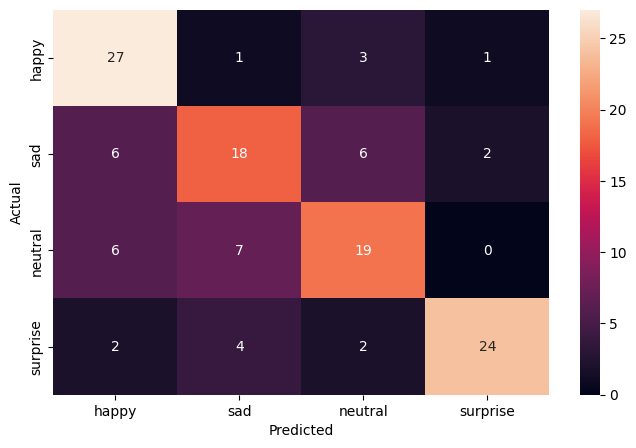

In [58]:
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True) 

test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', 
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [59]:
def plot_accuracy(history):
    """
    Plots the training and validation accuracy curves across epochs
    using the history object returned from model.fit().
    
    Parameters
    ----------
    history : keras.src.callbacks.history.History
        The history object of the model.

    Returns
    -------
    None.

    """

    # Number of training epochs (length of the accuracy list).
    N = len(history.history["accuracy"])
    # Create a new figure for the plot with a defined size.
    plt.figure(figsize=(7, 7))
    # Plot training accuracy over epochs.
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    # Plot validation accuracy on the same graph.
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    # Set the title of the plot.
    plt.title("Accuracy vs Epoch")
    # Label the x-axis as epochs.
    plt.xlabel("Epochs")
    # Label the y-axis as accuracy.
    plt.ylabel("Accuracy")
    # Display the legend in the upper-left corner.
    plt.legend(loc="upper left")

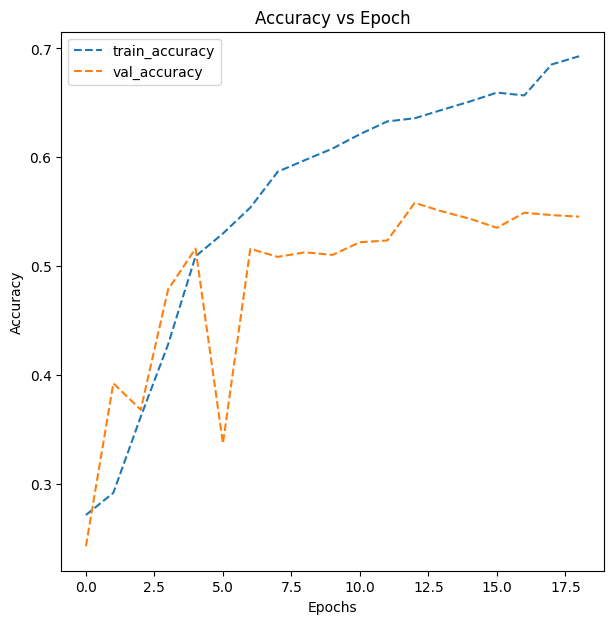

In [60]:
# Call the function to visualize accuracy curves.
plot_accuracy(history3)

**🔬 Observations**

**Key Observations from Confusion Matrix:**

1. Classes 0 and 3 are predicted better than classes 1 and 2.
2. The model seems biased toward certain classes (0 and 3), which may indicate **class imbalance** or **feature inadequacy** in grayscale images.
3. Despite low epoch accuracy, the test set evaluation shows 69% accuracy, which may be due to **batch selection effects**.

---

**Overall Remarks**

- The base model **struggles to learn** from grayscale images in the first few epochs.  
- Training is unstable, with validation accuracy dropping after initial improvement.  
- Confusion matrix shows **uneven performance across classes**, indicating the model is only partially effective at distinguishing some emotions.  
- Potential improvements:
  - More epochs or better learning rate scheduling.
  - Enhanced data augmentation.
  - Consider using RGB or 3-channel converted grayscale images for richer features.


## **VI. Conclusion**

### **i. Insights from the Study**

1. **Impact of Input Color Mode:**
   - Models trained on **grayscale images** generally performed better than those trained on RGB images for this dataset.
   - Base CNN models achieved ~68–76% accuracy on grayscale but dropped significantly (~29–66%) on RGB, suggesting that the additional color channels did not improve feature learning for facial emotion detection.

2. **Model Complexity vs Performance:**
   - Increasing model complexity (Model 3 – 5 CNN blocks) did not guarantee better performance.  
   - Overly deep architectures showed **overfitting or unstable training**, especially on small datasets or with grayscale inputs.
   - Simpler models (Model 1 and Model 2) with appropriate regularization and batch normalization were **more stable** and often outperformed complex CNNs.

3. **Transfer Learning Architectures:**
   - Pre-trained models like **VGG16, ResNet50, EfficientNet** did not yield satisfactory performance (~25% accuracy) on this dataset.  
   - Possible reasons:
     - These models expect **3-channel RGB images**, making them incompatible with grayscale inputs without modification.
     - The dataset size is small, limiting fine-tuning capability.
     - Domain mismatch: pre-trained weights were trained on general images (ImageNet), which may not capture subtle facial emotion features.

4. **Observations from Confusion Matrices:**
   - Certain classes (e.g., “happy” or “surprise”) were predicted better than others, indicating **class-specific bias**.
   - Models struggle with subtle emotions like “neutral” or “sad,” which may have overlapping facial features.

---

### **ii. Comparison of Techniques**

| Model / Technique       | Input Mode | Accuracy | Remarks |
|-------------------------|------------|----------|---------|
| Base CNN (Model 1)      | Grayscale  | 0.68     | Simple, stable, performs better on grayscale |
| Base CNN (Model 1)      | RGB        | 0.66     | Slightly worse, additional channels not useful |
| Advanced CNN (Model 2)  | Grayscale  | 0.76     | Best performance among CNNs, suitable for grayscale |
| Advanced CNN (Model 2)  | RGB        | 0.30     | RGB caused significant drop; model overfits |
| Complex CNN (Model 3)   | Grayscale  | 0.50     | Overly deep, moderate performance, potential overfitting |
| VGG16 Transfer Learning | RGB        | 0.25     | Poor performance, pre-trained features not compatible |
| ResNet50 TL             | RGB        | 0.25     | Similar to VGG16, unsuitable for small emotion dataset |
| EfficientNet TL         | RGB        | 0.25     | Small dataset and grayscale features not captured |

**Key Takeaways:**
- For small facial emotion datasets, **simpler CNN architectures with grayscale inputs** outperform transfer learning models.  
- Transfer learning is beneficial only when pre-trained weights closely match the target domain and input format.  
- RGB inputs did not improve performance and sometimes degraded it, highlighting the importance of **input representation**.

---

### **iii. Proposal for Final Solution Design**

Based on the observations and experiments, the recommended approach for a robust facial emotion detection system is:

1. **Input Representation:**
   - Use **grayscale images** with standardized size (48×48) to simplify the model and reduce computational overhead.
   - Optionally, apply histogram equalization or normalization for enhanced feature contrast.

2. **Model Architecture:**
   - **Advanced CNN (Model 2)** is recommended as the base:
     - 3 convolutional blocks with Conv2D → BatchNorm → LeakyReLU → MaxPooling → Dropout.
     - Flatten → Dense layers (512 → 128) → Softmax.
   - Keep the network shallow enough to avoid overfitting while capturing meaningful spatial features.

3. **Training Strategy:**
   - Use **data augmentation**: horizontal flips, slight brightness adjustment, shear transforms.
   - Apply **early stopping and learning rate reduction** to stabilize training.
   - Train for 20–30 epochs with a moderate
